<a href="https://colab.research.google.com/github/qinhuuuuu/MachineLearning/blob/main/Lab_6_20130356_PhanThiQuynhNhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/machineLearning'

Mounted at /content/gdrive
/content/gdrive/MyDrive/machineLearning


In [49]:
# code
import numpy
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
from sklearn import metrics as m
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as knc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable




#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
mnist = datasets.load_digits()
x = mnist.data
y = mnist.target
X_train_mnist , X_test_mnist , y_train_mnist , y_test_mnist  = tts(x, y, test_size = 0.3)
# Without using selection feature
# Random forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_mnist,y_train_mnist)
y_pred = clf.predict(X_test_mnist)
rf_ps =round(m.precision_score(y_test_mnist, y_pred, average='micro'), 4)
rf_rs =round(m.recall_score(y_test_mnist, y_pred, average='micro'), 4)
rf_fs=round(m.f1_score(y_test_mnist, y_pred, average='micro'), 4)
rf_ac =round(m.accuracy_score(y_test_mnist, y_pred), 4)
# NaiveBayes
model = GaussianNB()
model.fit(X_train_mnist, y_train_mnist)
y_pred = model.predict(X_test_mnist)
nb_ps =round(m.precision_score(y_test_mnist, y_pred, average='micro'), 4)
nb_rs =round(m.recall_score(y_test_mnist, y_pred, average='micro'), 4)
nb_fs=round(m.f1_score(y_test_mnist, y_pred, average='micro'), 4)
nb_ac =round(m.accuracy_score(y_test_mnist, y_pred), 4)
# svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_mnist, y_train_mnist)
y_pred = clf_svm.predict(X_test_mnist)
svm_ps =round(m.precision_score(y_test_mnist, y_pred, average='micro'), 4)
svm_rs =round(m.recall_score(y_test_mnist, y_pred, average='micro'), 4)
svm_fs=round(m.f1_score(y_test_mnist, y_pred, average='micro'), 4)
svm_ac =round(m.accuracy_score(y_test_mnist, y_pred), 4)
# 
d_rf = {'Accuracy':rf_ac, 'Precision':rf_ps, 'Recall':rf_rs, 'F1': rf_fs}
d_naiveBayes =  {'Accuracy': nb_ac, 'Precision': nb_ps, 'Recall': nb_rs, 'F1': nb_fs}
d_svm = {'Accuracy': svm_ac, 'Precision': svm_ps, 'Recall': svm_rs, 'F1': svm_fs}
pd.DataFrame({'RandomForest' : pd.Series(d_rf), 'NaivePayes':pd.Series(d_naiveBayes), 'SVM': pd.Series(d_svm)})

,RandomForest,NaivePayes,SVM
Accuracy,0.9648,0.8444,0.9852
Precision,0.9648,0.8444,0.9852
Recall,0.9648,0.8444,0.9852
F1,0.9648,0.8444,0.9852


In [ ]:
#  using selection feature
model = LogisticRegression(solver='lbfgs')
rfe = RFE(estimator=model, n_features_to_select=3)
X = rfe.fit_transform(x, y)
X_train_mnist , X_test_mnist , y_train_mnist , y_test_mnist  = tts(X, y, test_size = 0.3)
# Random forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_mnist,y_train_mnist)
y_pred = clf.predict(X_test_mnist)
rf_ps =round(m.precision_score(y_test_mnist, y_pred, average='micro'), 4)
rf_rs =round(m.recall_score(y_test_mnist, y_pred, average='micro'), 4)
rf_fs=round(m.f1_score(y_test_mnist, y_pred, average='micro'), 4)
rf_ac =round(m.accuracy_score(y_test_mnist, y_pred), 4)
# NaiveBayes
model = GaussianNB()
model.fit(X_train_mnist, y_train_mnist)
y_pred = model.predict(X_test_mnist)
nb_ps =round(m.precision_score(y_test_mnist, y_pred, average='micro'), 4)
nb_rs =round(m.recall_score(y_test_mnist, y_pred, average='micro'), 4)
nb_fs=round(m.f1_score(y_test_mnist, y_pred, average='micro'), 4)
nb_ac =round(m.accuracy_score(y_test_mnist, y_pred), 4)
# svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_mnist, y_train_mnist)
y_pred = clf_svm.predict(X_test_mnist)
svm_ps =round(m.precision_score(y_test_mnist, y_pred, average='micro'), 4)
svm_rs =round(m.recall_score(y_test_mnist, y_pred, average='micro'), 4)
svm_fs=round(m.f1_score(y_test_mnist, y_pred, average='micro'), 4)
svm_ac =round(m.accuracy_score(y_test_mnist, y_pred), 4)
# 
d_rf = {'Accuracy':rf_ac, 'Precision':rf_ps, 'Recall':rf_rs, 'F1': rf_fs}
d_naiveBayes =  {'Accuracy': nb_ac, 'Precision': nb_ps, 'Recall': nb_rs, 'F1': nb_fs}
d_svm = {'Accuracy': svm_ac, 'Precision': svm_ps, 'Recall': svm_rs, 'F1': svm_fs}
pd.DataFrame({'RandomForest' : pd.Series(d_rf), 'NaivePayes':pd.Series(d_naiveBayes), 'SVM': pd.Series(d_svm)})

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

,RandomForest,NaivePayes,SVM
Accuracy,0.4963,0.4741,0.5093
Precision,0.4963,0.4741,0.5093
Recall,0.4963,0.4741,0.5093
F1,0.4963,0.4741,0.5093


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



In [11]:
data = pd.read_csv('bank.csv')


#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [12]:
#code
sc = StandardScaler()
data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = sc.fit_transform(data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [13]:
#code
encoder = OneHotEncoder()
en_data = encoder.fit_transform(data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
en_df = pd.DataFrame(en_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']))
data = pd.concat([data, en_df], axis=1)
data.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
data['deposit'] = data['deposit'].map({'yes':1, 'no' : 0})
x_train, x_test, y_train, y_test = tts(data.drop(['deposit'], axis=1), data['deposit'], test_size=0.3, random_state=1)
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

Accuracy: 0.7975515079128098
Precision: 0.7830950901180858
Recall: 0.7929515418502202
F1: 0.7879924953095685
[[1411  349]
 [ 329 1260]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1760
           1       0.78      0.79      0.79      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



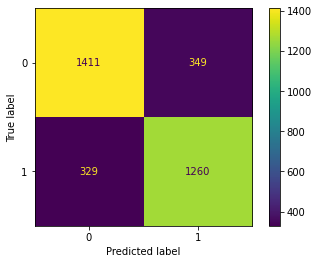

In [19]:
#code
# decision Tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict)
tree_rs = m.recall_score(y_test, y_predict)
tree_fs = m.f1_score(y_test, y_predict)
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 1 ... 0 1 0]
Accuracy: 0.8483129292326067
Precision: 0.8173810921902525
Recall: 0.8760226557583386
F1: 0.8456865127582017
[[1449  311]
 [ 197 1392]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



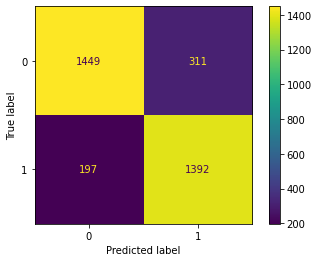

In [21]:
# Random forest
clf=RandomForestClassifier() 
clf.fit(x_train,y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
rf_ac = m.accuracy_score(y_test, y_predict)
rf_ps = m.precision_score(y_test, y_predict)
rf_rs = m.recall_score(y_test, y_predict)
rf_fs = m.f1_score(y_test, y_predict)
print('Accuracy:',rf_ac)
print('Precision:',rf_ps)
print('Recall:',rf_rs)
print('F1:',rf_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 0 ... 0 1 0]
Accuracy: 0.6754255001492983
Precision: 0.6611039794608472
Recall: 0.6482064191315292
F1: 0.6545916746107404
[[1232  528]
 [ 559 1030]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1760
           1       0.66      0.65      0.65      1589

    accuracy                           0.68      3349
   macro avg       0.67      0.67      0.67      3349
weighted avg       0.68      0.68      0.68      3349



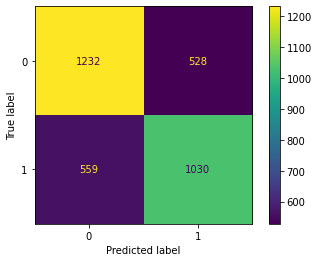

In [22]:
#Navie Bayes
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
nb_ac = m.accuracy_score(y_test, y_predict)
nb_ps = m.precision_score(y_test, y_predict)
nb_rs = m.recall_score(y_test, y_predict)
nb_fs = m.f1_score(y_test, y_predict)
print('Accuracy:',nb_ac)
print('Precision:',nb_ps)
print('Recall:',nb_rs)
print('F1:',nb_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

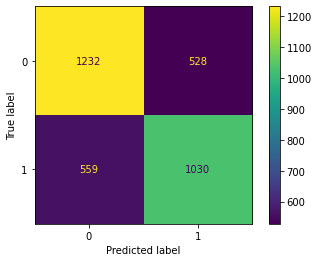

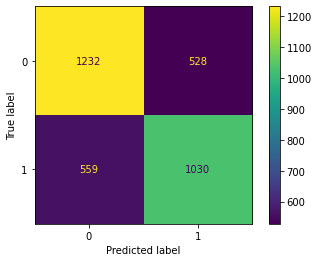

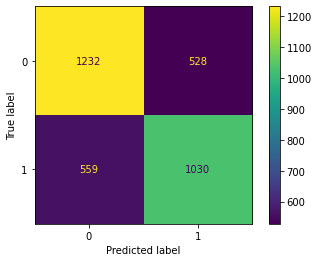

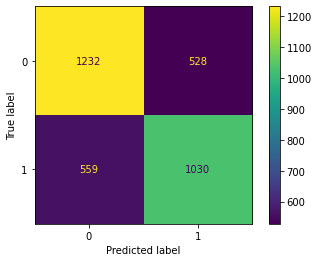

In [25]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred))
  recall.append( m.recall_score(y_test, pred))
  f1.append(m.f1_score(y_test, pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [26]:
#code
clf = RandomForestClassifier()
x = data.drop(['deposit'], axis=1)
clf.fit(x, data['deposit'])

RandomForestClassifier()

In [27]:
feature_imp = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp.head(20)

duration            0.334642
balance             0.076580
age                 0.072613
day                 0.065868
campaign            0.033928
pdays               0.032408
poutcome_success    0.031297
contact_cellular    0.018795
contact_unknown     0.018039
previous            0.017889
housing_no          0.017616
housing_yes         0.015534
poutcome_unknown    0.013422
month_apr           0.013380
month_mar           0.012470
month_may           0.012011
month_oct           0.011471
month_aug           0.011265
month_jun           0.009925
marital_married     0.009834
dtype: float64

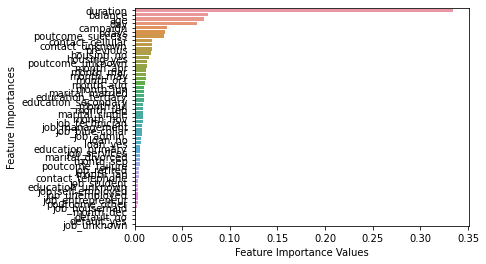

In [32]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Values')
plt.ylabel('Feature Importances')
plt.show()

In [33]:
x_train, x_test, y_train, y_test = tts(data[feature_imp.index[:21].values], data['deposit'], test_size=0.3, random_state=1)

[0 0 0 ... 0 1 0]
Accuracy:  0.8432367871006271
Precision:  0.8133097762073027
Recall:  0.8691000629326621
F1:  0.8402798904776392


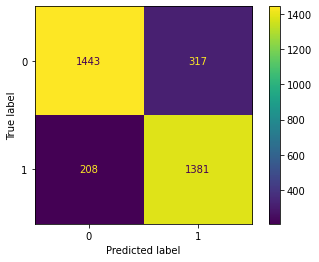

In [40]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF_feature=['RF Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

[0 0 0 ... 0 0 0]
Accuracy:  0.7372349955210511
Precision:  0.8297674418604651
Recall:  0.5613593455003146
F1:  0.6696696696696697


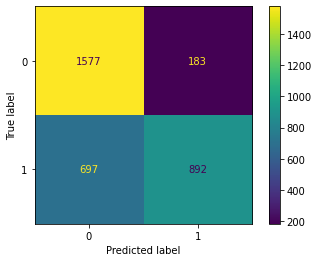

In [41]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB_feature=['Naive Bayes Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

Accuracy:  0.7790385189608838
Precision:  0.7648159700561448
Recall:  0.7715544367526747
F1:  0.768170426065163


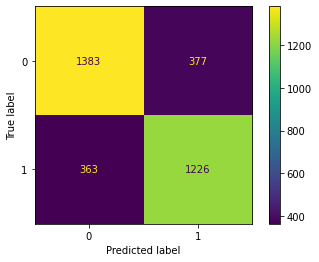

In [43]:
#Decision Tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
tree_feature=['Decision Tree Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

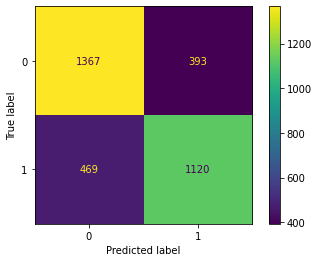

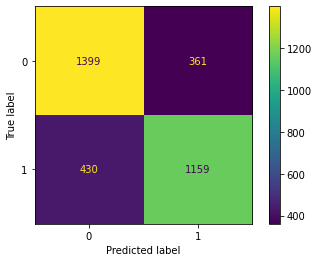

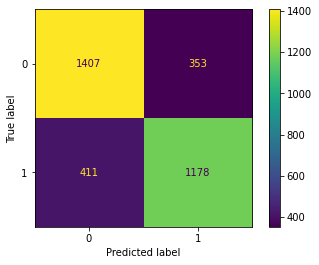

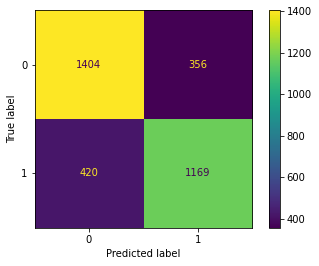

In [46]:
#KNN
k_range = range(1,8,2)
ac = []
ps = []
rs = []
fs = []
for k in k_range:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  ac.append(m.accuracy_score(y_test, y_predict))
  ps.append(m.precision_score(y_test, y_predict))
  rs.append(m.recall_score(y_test, y_predict))
  fs.append(m.f1_score(y_test, y_predict))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

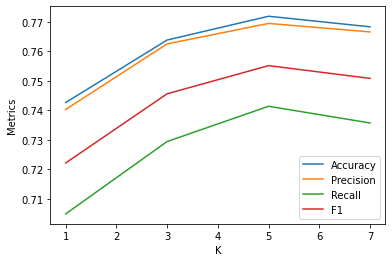

In [47]:
plt.plot(k_range, ac, label='Accuracy')
plt.plot(k_range, ps, label='Precision')
plt.plot(k_range, rs, label='Recall')
plt.plot(k_range, fs, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [51]:
# code
#  ap dung lua chon dac trung xem no co tot hon lab5 hay k
data = pd.read_csv('creditcard.csv')
x = data.drop('Class', axis=1)
y = data[['Class']]
x_train, x_test, y_train, y_test = tts(x, y,test_size=0.3, random_state=1)


#Finally,
Save a copy in your Github. Remember renaming the notebook.